<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications-2025/blob/main/485%5B2025%5D_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


An AutoEncoder (AE)

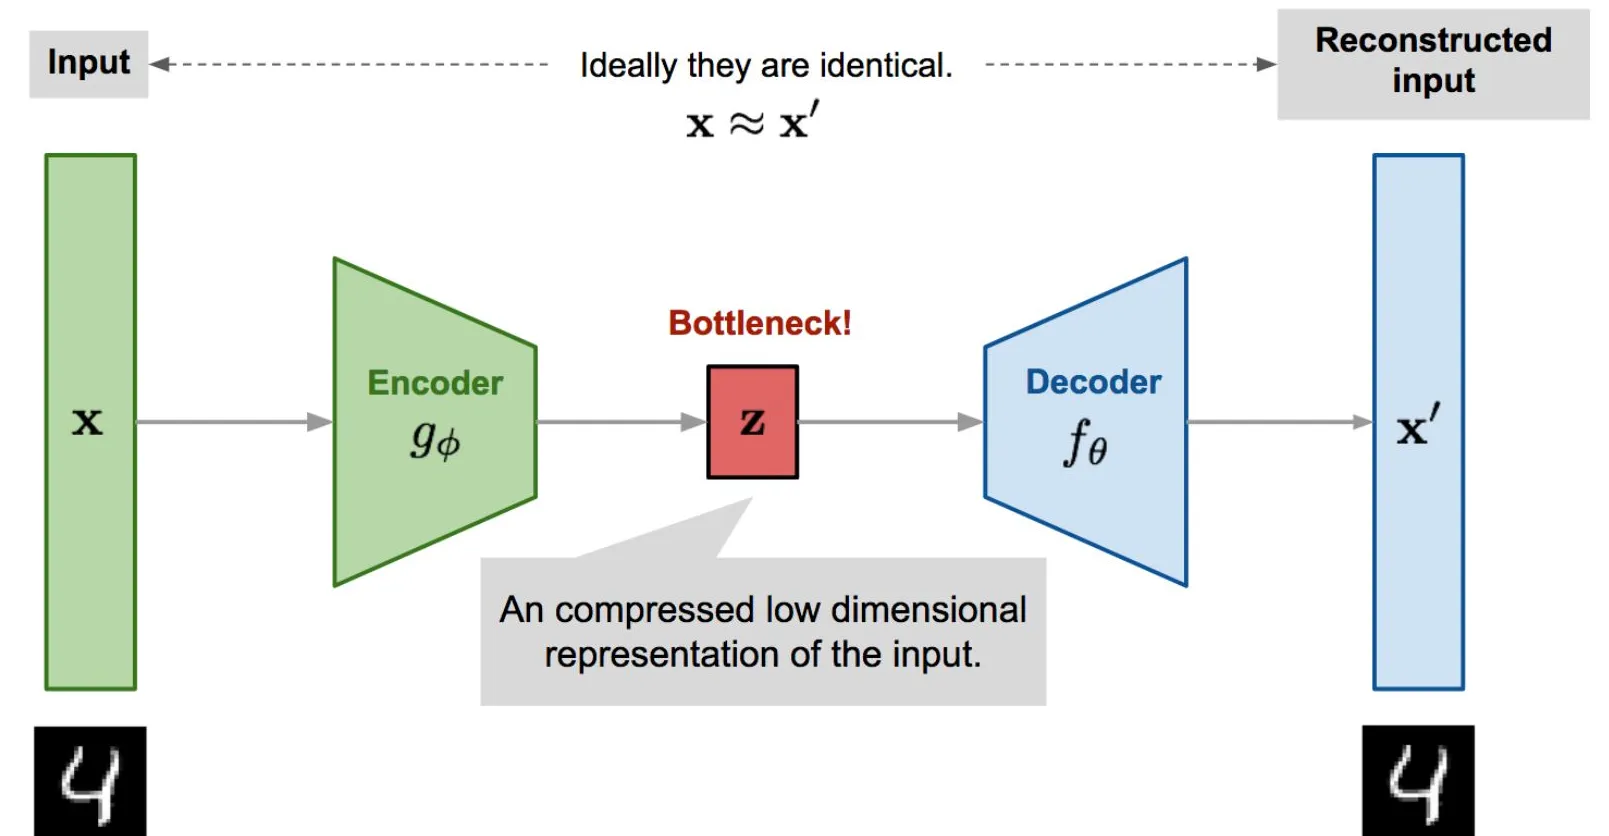

In [28]:
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded_output = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded_output)
decoded = Dense(128, activation='relu')(decoded)
decoded_output = Dense(784, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(input_img, decoded_output)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0973 - val_loss: 0.0363
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0332 - val_loss: 0.0250
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0241 - val_loss: 0.0203
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0202 - val_loss: 0.0183
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0183 - val_loss: 0.0170
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0170 - val_loss: 0.0158
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0159 - val_loss: 0.0149
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0131 - val_loss: 0.0124
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


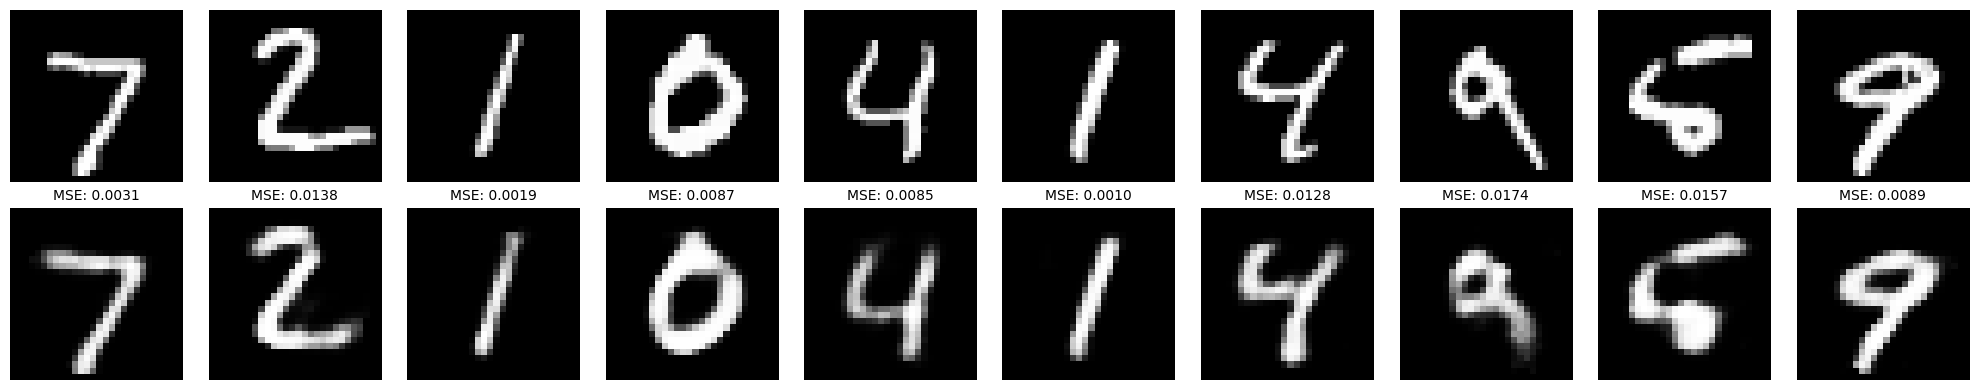

In [31]:
# Reconstruction
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    mse = mean_squared_error(x_test[i].reshape(-1), decoded_imgs[i].reshape(-1))
    ax.set_title(f"MSE: {mse:.4f}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()



A Variational Autoencoder (VAE)

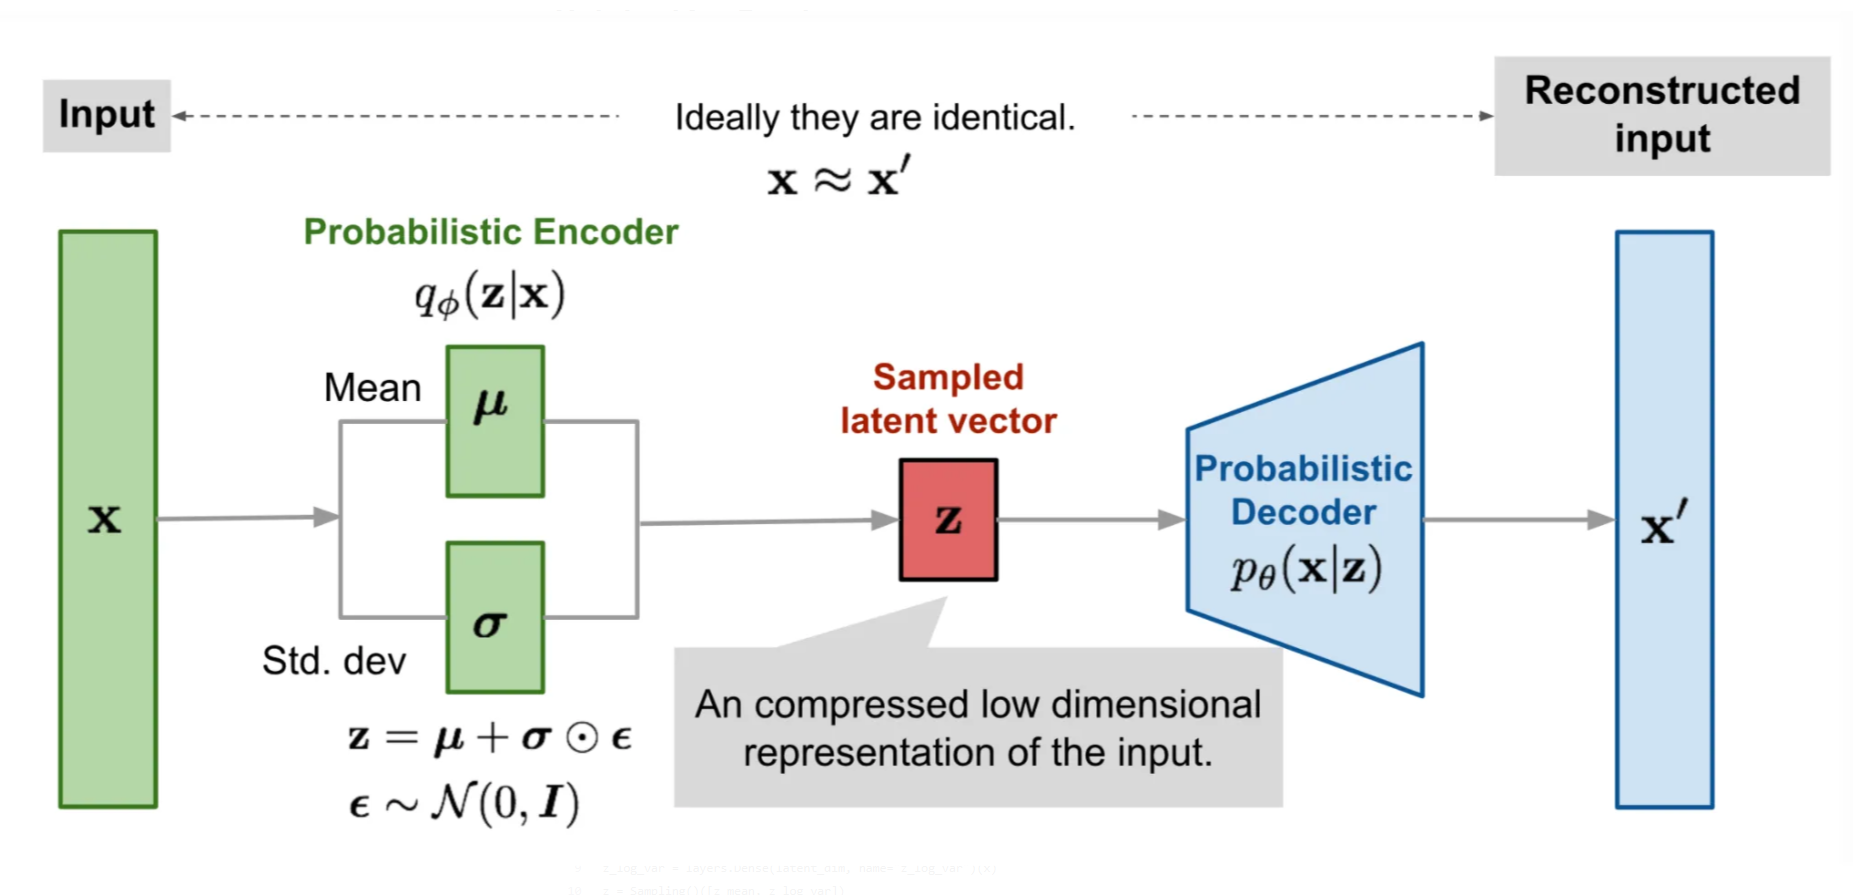

In [33]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [37]:
latent_dim = 2  # For easy visualization

# Encoder
inputs = layers.Input(shape=(784,))
h = layers.Dense(256, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)
z = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(256, activation='relu')(latent_inputs)
outputs = layers.Dense(784, activation='sigmoid')(x)
decoder = tf.keras.Model(latent_inputs, outputs, name="decoder")


In [42]:
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer):
        super().compile()
        self.optimizer = optimizer
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker = tf.keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Compute losses
            recon_loss = tf.reduce_mean(tf.reduce_sum(tf.math.squared_difference(data, reconstruction), axis=1))

            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Track losses
        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [43]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae.fit(x_train, epochs=30, batch_size=128)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - kl_loss: 5.3989 - loss: 68.5399 - recon_loss: 63.1410
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - kl_loss: 1.9374 - loss: 42.7739 - recon_loss: 40.8365
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - kl_loss: 2.0783 - loss: 40.9348 - recon_loss: 38.8566
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - kl_loss: 2.1384 - loss: 40.3632 - recon_loss: 38.2248
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - kl_loss: 2.1946 - loss: 39.6714 - recon_loss: 37.4768
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - kl_loss: 2.2594 - loss: 39.1272 - recon_loss: 36.8678
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - kl_loss: 2.3032 - loss: 38.7555 - recon_loss: 36.4523
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - kl_loss: 2.3543 - loss: 38.3900 - recon_loss: 36.0357
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - kl_loss: 2.4002 - loss: 38.1529 - recon_loss: 35.7528
Epoch 10/30
469/

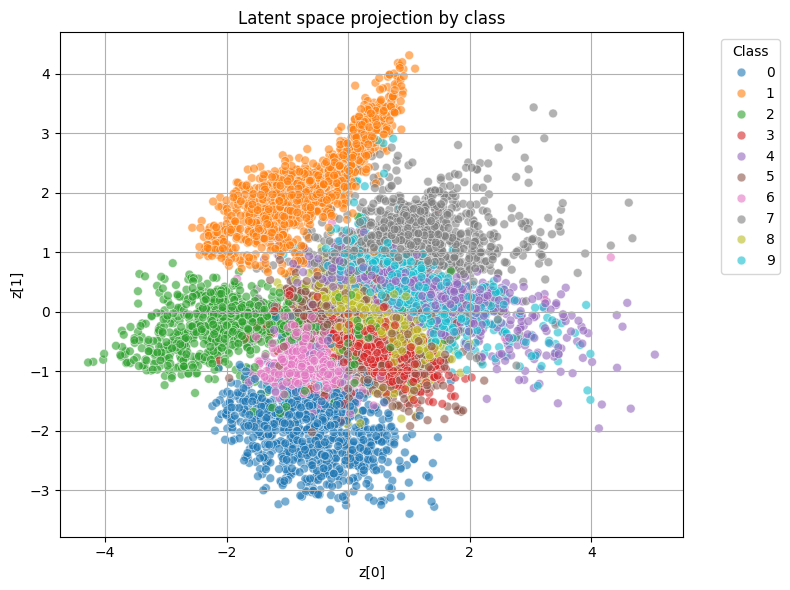

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the latent representations
z_mean, _, _ = encoder.predict(x_test, batch_size=128, verbose=0)

# Plot with color based on class labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=z_mean[:, 0], y=z_mean[:, 1], hue=y_test, palette="tab10", alpha=0.6, s=40, edgecolor="w", linewidth=0.5)
plt.title("Latent space projection by class")
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.grid(True)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


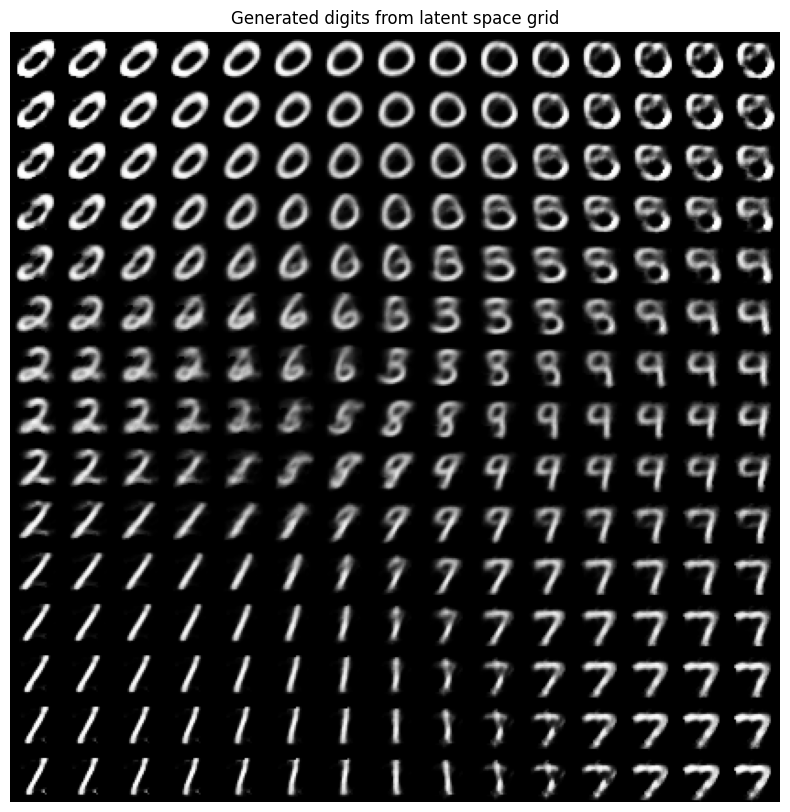

In [45]:
# Create a grid of latent points and decode them
n = 15
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)
digit_size = 28

figure = np.zeros((digit_size * n, digit_size * n))

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.axis('off')
plt.title("Generated digits from latent space grid")
plt.show()


Task: Modify the VAE to use Binary Crossentropy, MSE, and MAE as reconstruction losses.

Task: Select two images, encode them, and interpolate linearly between their latent vectors.

Task: Randomly sample points from a 2D standard normal distribution and decode them.

Task: Use reconstruction error (e.g., MSE) as a signal to identify anomalies in data.


